# 1. Import Necessary libraries

In [ ]:
# !pip install xgboost
# !pip install lightgbm

In [43]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2. Import Dataset

In [2]:
credit_card_data = pd.read_csv('credit_card_clean.csv')
credit_card_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,highschool,married,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,male,highschool,single,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,male,highschool,married,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


## 3. Data Understanding

### Exploring the variable
* ID : ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1=male, 2=female)

* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

* MARRIAGE: Marital status (1=married, 2=single, 3=others)

* AGE: Age in years

* PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

#### Target variable
default.payment.next.month: Default payment (1=yes, 0=no)

###### Note: NT is Taiwain Dollars

In [3]:
credit_card_data.shape

(30000, 25)

In [4]:
credit_card_data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [5]:
credit_card_data.dtypes

ID             int64
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

# 4. Data Preparation

In [6]:
del credit_card_data['ID']

In [10]:
le = LabelEncoder()
credit_card_data['SEX']       = le.fit_transform(credit_card_data['SEX'])
credit_card_data['EDUCATION'] = le.fit_transform(credit_card_data['EDUCATION'])
credit_card_data['MARRIAGE']  = le.fit_transform(credit_card_data['MARRIAGE'])
credit_card_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,0,3,0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,1,0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,1,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,3,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,1,0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [11]:
credit_card_data.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int32
MARRIAGE       int32
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

# 5. Model Building

In [13]:
X = credit_card_data.drop('DEFAULT',axis = 1)
y = credit_card_data[['DEFAULT']]

In [14]:
X.shape,y.shape

((30000, 23), (30000, 1))

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=12,stratify=y)

In [16]:
X_train.shape,y_train.shape

((24000, 23), (24000, 1))

In [17]:
X_test.shape,y_test.shape

((6000, 23), (6000, 1))

# 6. Model Training

In [23]:
rf_classifier  = RandomForestClassifier(n_estimators=100,)
adb_classifier = AdaBoostClassifier(n_estimators=100)
gb_classifier  = GradientBoostingClassifier(n_estimators=100)
xgb_classifier = XGBClassifier(n_estimators=100)
lgb_classifier = LGBMClassifier(n_estimators=100)

### Training Time Analysis

In [29]:
%%time
rf_classifier.fit(X_train,y_train)

Wall time: 7.51 s


RandomForestClassifier()

In [24]:
%%time
adb_classifier.fit(X_train,y_train)

Wall time: 4.53 s


AdaBoostClassifier(n_estimators=100)

In [25]:
%%time
gb_classifier.fit(X_train,y_train)

Wall time: 10.4 s


GradientBoostingClassifier()

In [26]:
%%time
xgb_classifier.fit(X_train,y_train)

[21:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 4.52 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
%%time
lgb_classifier.fit(X_train,y_train)

Wall time: 561 ms


LGBMClassifier()

# 7. Model Testing

In [30]:
y_pred_rf  = rf_classifier.predict(X_test)
y_pred_adb = adb_classifier.predict(X_test)
y_pred_gb  = gb_classifier.predict(X_test)
y_pred_xgb = xgb_classifier.predict(X_test)
y_pred_lgb = lgb_classifier.predict(X_test)

# 8. Model Evaluation

In [31]:
print('Accuracy Score of RF : ',accuracy_score(y_test,y_pred_rf))
print('Accuracy Score of ADB: ',accuracy_score(y_test,y_pred_adb))
print('Accuracy Score of GB : ',accuracy_score(y_test,y_pred_gb))
print('Accuracy Score of XGB: ',accuracy_score(y_test,y_pred_xgb))
print('Accuracy Score of LGB: ',accuracy_score(y_test,y_pred_lgb))

Accuracy Score of RF :  0.819
Accuracy Score of ADB:  0.8198333333333333
Accuracy Score of GB :  0.8248333333333333
Accuracy Score of XGB:  0.8153333333333334
Accuracy Score of LGB:  0.822


## =======================================================================

# FEATURE IMPORTANCE

In [37]:
rf_features  = rf_classifier.feature_importances_
adb_features = adb_classifier.feature_importances_
gb_features  = gb_classifier.feature_importances_
xgb_features = xgb_classifier.feature_importances_
lgb_features = lgb_classifier.feature_importances_

In [35]:
X.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [39]:
feature_importance = pd.DataFrame( data={'Features'     :X.columns,
                                        'RF Features'  :rf_features,
                                        'ADB Features' :adb_features,
                                        'GB Features'  :gb_features,
                                        'XGB Features' :xgb_features,
                                        'LGB Features' :lgb_features})
feature_importance

,Features,RF Features,ADB Features,GB Features,XGB Features,LGB Features
0,LIMIT_BAL,0.059736,0.04,0.032666,0.024132,215
1,SEX,0.012427,0.01,0.002271,0.017697,35
2,EDUCATION,0.018390,0.00,0.002574,0.020403,64
3,MARRIAGE,0.012805,0.01,0.004880,0.020488,36
4,AGE,0.066166,0.04,0.006101,0.017460,201
5,PAY_1,0.098046,0.13,0.629924,0.356028,103
6,PAY_2,0.041878,0.07,0.083481,0.117766,44
7,PAY_3,0.025942,0.02,0.032262,0.049169,50
8,PAY_4,0.024440,0.02,0.017902,0.041508,37
9,PAY_5,0.020169,0.03,0.016205,0.042685,37


### 1. Display the important features of RandomForest

In [41]:
rf_important_features = feature_importance.sort_values(by = 'RF Features',ascending=False)
rf_important_features

,Features,RF Features,ADB Features,GB Features,XGB Features,LGB Features
5,PAY_1,0.098046,0.13,0.629924,0.356028,103
4,AGE,0.066166,0.04,0.006101,0.017460,201
11,BILL_AMT1,0.061624,0.09,0.035177,0.024950,264
0,LIMIT_BAL,0.059736,0.04,0.032666,0.024132,215
12,BILL_AMT2,0.054034,0.01,0.009238,0.020618,132
13,BILL_AMT3,0.052382,0.08,0.008617,0.021075,147
16,BILL_AMT6,0.051673,0.02,0.006038,0.019284,171
17,PAY_AMT1,0.050561,0.07,0.016107,0.020551,191
15,BILL_AMT5,0.050252,0.05,0.007004,0.019262,132
14,BILL_AMT4,0.049082,0.03,0.006136,0.021458,154


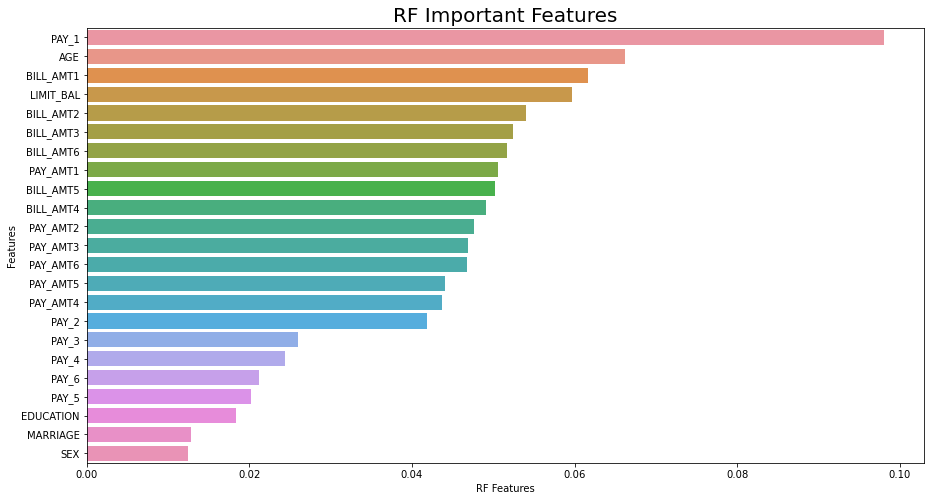

In [47]:
plt.figure(figsize=(15,8))
sns.barplot(x='RF Features',y='Features',data=rf_important_features)
plt.title('RF Important Features', size = 20)
plt.show()

## 2. Display the important features of LightGBM

In [50]:
lgb_features = feature_importance.sort_values(by = 'LGB Features',ascending=False)
lgb_features

,Features,RF Features,ADB Features,GB Features,XGB Features,LGB Features
11,BILL_AMT1,0.061624,0.09,0.035177,0.024950,264
0,LIMIT_BAL,0.059736,0.04,0.032666,0.024132,215
4,AGE,0.066166,0.04,0.006101,0.017460,201
22,PAY_AMT6,0.046751,0.02,0.007907,0.019443,199
19,PAY_AMT3,0.046926,0.09,0.024370,0.024963,192
17,PAY_AMT1,0.050561,0.07,0.016107,0.020551,191
21,PAY_AMT5,0.044113,0.02,0.007011,0.019935,182
18,PAY_AMT2,0.047694,0.07,0.019145,0.022695,181
16,BILL_AMT6,0.051673,0.02,0.006038,0.019284,171
20,PAY_AMT4,0.043746,0.06,0.006978,0.020059,164


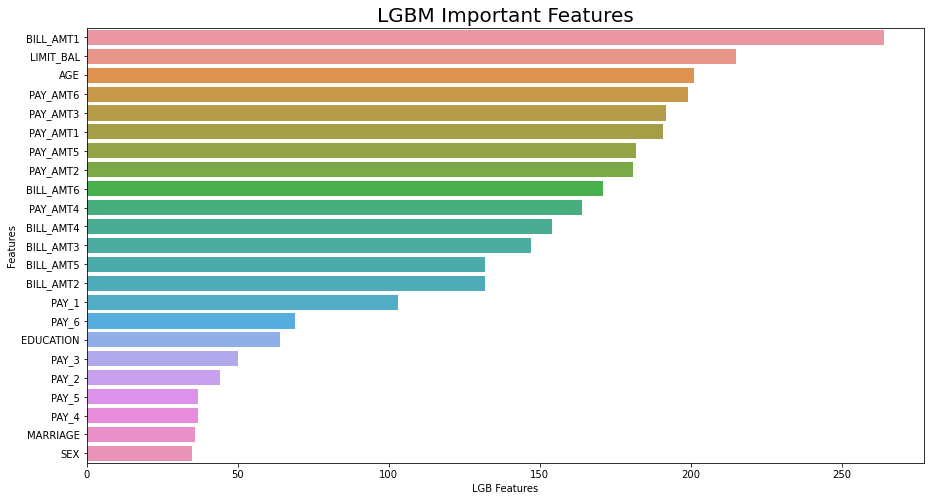

In [51]:
plt.figure(figsize=(15,8))
sns.barplot(x='LGB Features',y='Features',data=lgb_features)
plt.title('LGBM Important Features', size = 20)
plt.show()

# THE END!!!!